# **Titanic: Machine Learning from Disaster**
[Overview on kaggle](https://www.kaggle.com/c/titanic/overview)

Highlights to note.

*  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
*   One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
*   Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


![titanic](http://newsinstact.com/wp-content/uploads/2019/03/1-titanic-sos-signal.jpg)









**Workflow stages**


*   Question or problem definition.
*   Acquire training and testing data.
*   Wrangle, prepare, cleanse the data.
*   Analyze, identify patterns, and explore the data.
*   Model, predict and solve the problem.
*   Visualize, report, and present the problem solving steps and final solution.
*   Supply or submit the results.

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Data Dictionary**

survival	= Survival	
pclass	= Ticket class	
sex =	Sex	
Age	= Age in years	
sibsp	= number of siblings / spouses aboard the Titanic	
parch	= number of parents / children aboard the Titanic	
ticket	= Ticket number	
fare	= Passenger fare	(транспортные расходы)
cabin	= Cabin number	
embarked	= Port of Embarkation (посадка)



**Categorical**
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Numerical**
Continous: Age, Fare. Discrete: SibSp, Parch.

In [ ]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**What is the distribution of numerical feature values across the samples?**

*This helps us determine, among other early insights, **how representative is the training dataset** of the actual problem domain.*


*  Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
*  Survived is a categorical feature with 0 or 1 values.
*  Around 38% samples survived representative of the *actual survival rate at 32%*.
*  Most passengers (> 75%) *did not travel with parents or children*.
*  Nearly 30% of the passengers *had siblings and/or spouse aboard*.
*  Fares varied significantly with few passengers (<1%) paying as high as $512.
*  Few elderly passengers (<1%) within *age range 65-80*.

In [ ]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


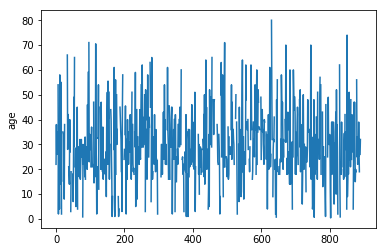

In [ ]:
# experiments
# plotting age based on passengers Id
plt.plot(train_df['Age'])
plt.ylabel('age')
plt.show()

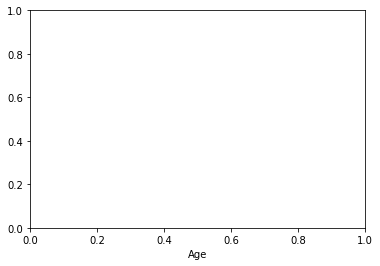

In [ ]:
# experiments
# Density Plot and Histogram of all arrival delays
sns.distplot(train_df['Age'], hist=False, kde=False, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Text(0.5, 0, 'passenger id')

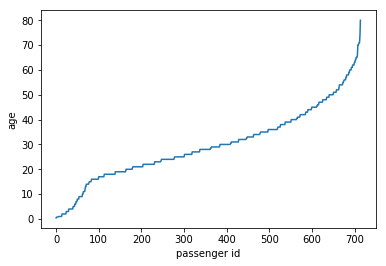

In [ ]:
# experiments
plt.plot(np.sort(train_df['Age']))
plt.ylabel('age')
plt.xlabel('passenger id')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: numpy.percentile
  del sys.path[0]


Text(0.5, 0, 'percentage')

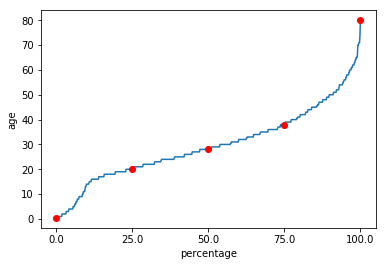

In [ ]:
# experiments
# Here we plot the amount of varius age groups based on percentage

from matplotlib import mlab
import matplotlib.pyplot as plt

d = np.sort(train_df['Age'])

d = d[~np.isnan(d)]


# Percentile values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])

perc = mlab.prctile(d, p=p)

plt.plot(d)
# Place red dots on the percentiles
plt.plot((len(d)-1) * p/100., perc, 'ro')

# Set tick locations and labels
plt.xticks((len(d)-1) * p/100., map(str, p))


plt.ylabel('age')
plt.xlabel('percentage')

Where:

**mean** (среднее значение)

**std** - standard deviation (стандартное отклонение)

> *The std is a measure that is used to quantify the **amount of variation or dispersion of a set of data values**. A low standard deviation indicates that the data points tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the data points are spread out over a wider range of values.*


**.describe( )** - generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


> *percentiles : list-like of numbers, optional*

> The percentiles to include in the output. All should fall between 0 and 1. The default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.



Source: [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)








### What is the distribution of categorical features?



In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Mr. Ernesti Arvid",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
?pd.DataFrame.describe

# **Assumtions based on data analysis**

**Correlating**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing**

1. We may want to complete **Age feature as it is definitely correlated to survival.**
2. We may want to complete the **Embarked feature as it may also correlate with survival or another important feature.**

**Correcting**

1. **Ticket** feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. **Cabin** feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. **PassengerId** may be dropped from training dataset as it does not contribute to survival.
4. **Name** feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating**

1. We may want to create a new feature called **Family based on Parch and SibSp to get total count of family members on board.**
2. We may want to engineer the **Name feature to extract Title as a new feature.**
3. We may want to create new feature for **Age bands (возрастные группы). This turns a continous numerical feature into an ordinal categorical feature.**
4. We may also want to create a **Fare range** feature if it helps our analysis.

**Classifying**

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.


# Analyze by pivoting features


In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
?pd.DataFrame.groupby

**Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).count().sort_values(by='Pclass', ascending=True)

,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


In [ ]:
train_df[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).count().sort_values(by='Pclass', ascending=True)

,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


**Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# experiments
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

![alt text](https://)# Analyze by visualizing data¶

## **Correlating numerical features**

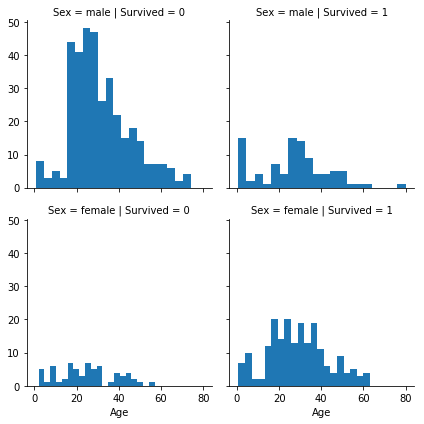

In [ ]:
g = sns.FacetGrid(train_df, col='Survived', row='Sex')
g.map(plt.hist, 'Age', bins=20)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations.**

1. Infants (Age <=4) had high survival rate.
2. Oldest passengers (Age = 80) survived.
3. Large number of 15-25 year olds did not survive.
4. Most passengers are in 15-35 age range.

**Decisions.**

1. We should consider **Age** (our assumption classifying #2) in our model training.
2. Complete the **Age feature for null values** (completing #1).
3. We should **band age groups** (creating #3).


## **Correlating numerical and ordinal features**


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


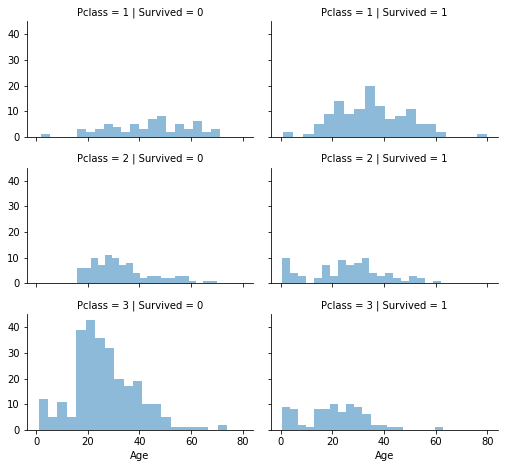

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# Band the Fare
train_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 3)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


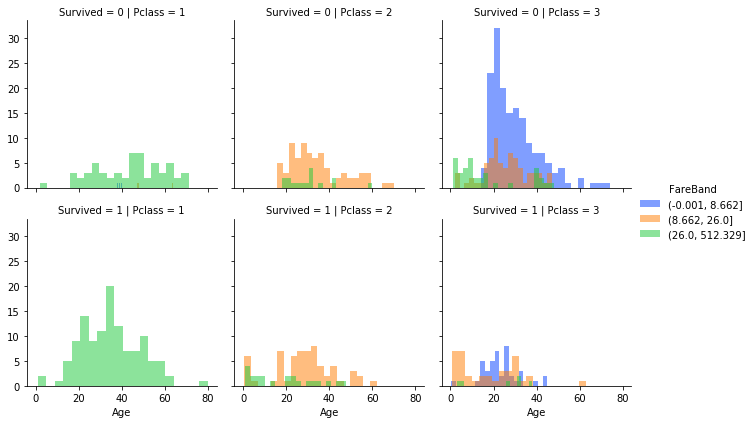

In [ ]:
grid = sns.FacetGrid(train_df, col='Pclass', row='Survived', hue='FareBand', palette='bright')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Here we look at the corelation between Pclass, Age and Fare. 
# To make out life easier we divide the Fare into three bands.  

# here we can see an interesting thing --> 
# the children in the Pclass 3 have paid high amount of money for the Fare; However they did not survived ???

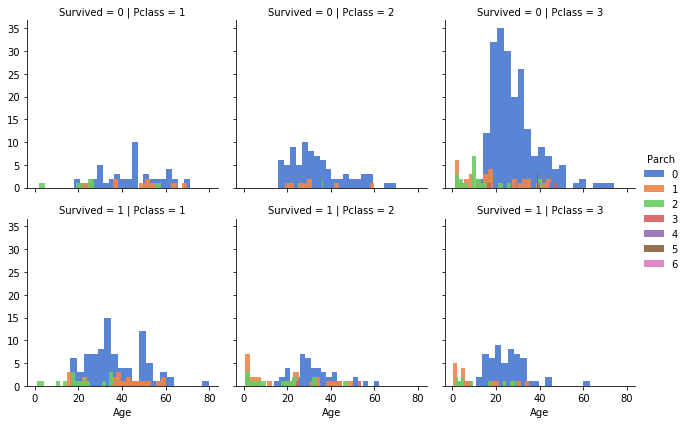

In [ ]:
grid = sns.FacetGrid(train_df, col='Pclass', row='Survived', hue='Parch', palette='muted')
grid.map(plt.hist, 'Age', alpha=.9, bins=20)
grid.add_legend();

# We can see that the yougest people in the Pclass 3 who did not survived paid a higher Fare. Why? 
# And they are not travaling alone (1-2 parents). Where are their parents? 

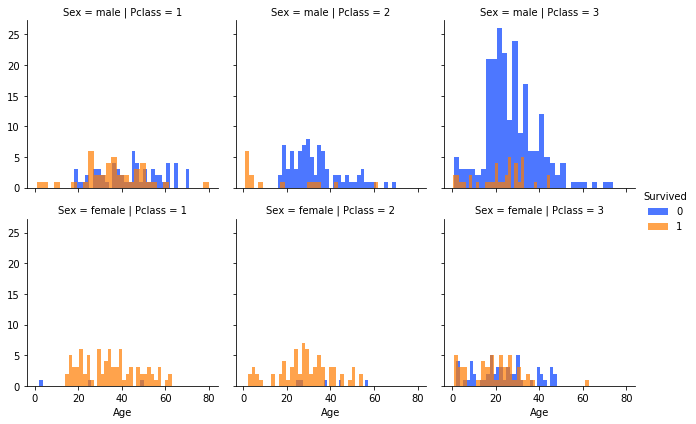

In [ ]:
grid = sns.FacetGrid(train_df, col='Pclass', row='Sex', hue='Survived', palette='bright')
grid.map(plt.hist, 'Age', alpha=.7, bins=30)
grid.add_legend();


**Observations.**

* Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
* Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
* Pclass varies in terms of Age distribution of passengers.

**Decisions.**

* Consider Pclass for model training

## Correlating categorical features¶

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


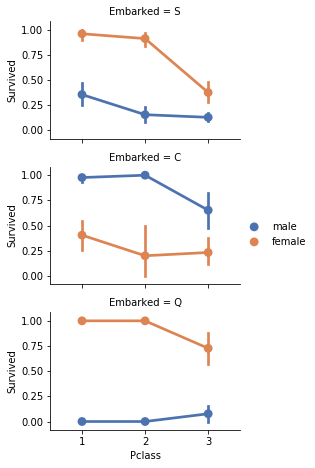

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

**Observations.**

* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions.**

* Add **Sex** feature to model training.
* Complete and add **Embarked** feature to model training.

## Correlating categorical and numerical features

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


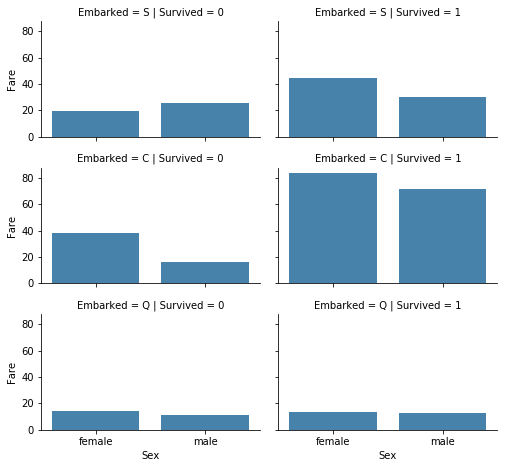

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.9, ci=None)
grid.add_legend()

**Observations.**

* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions.**

* Consider **banding Fare feature.**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


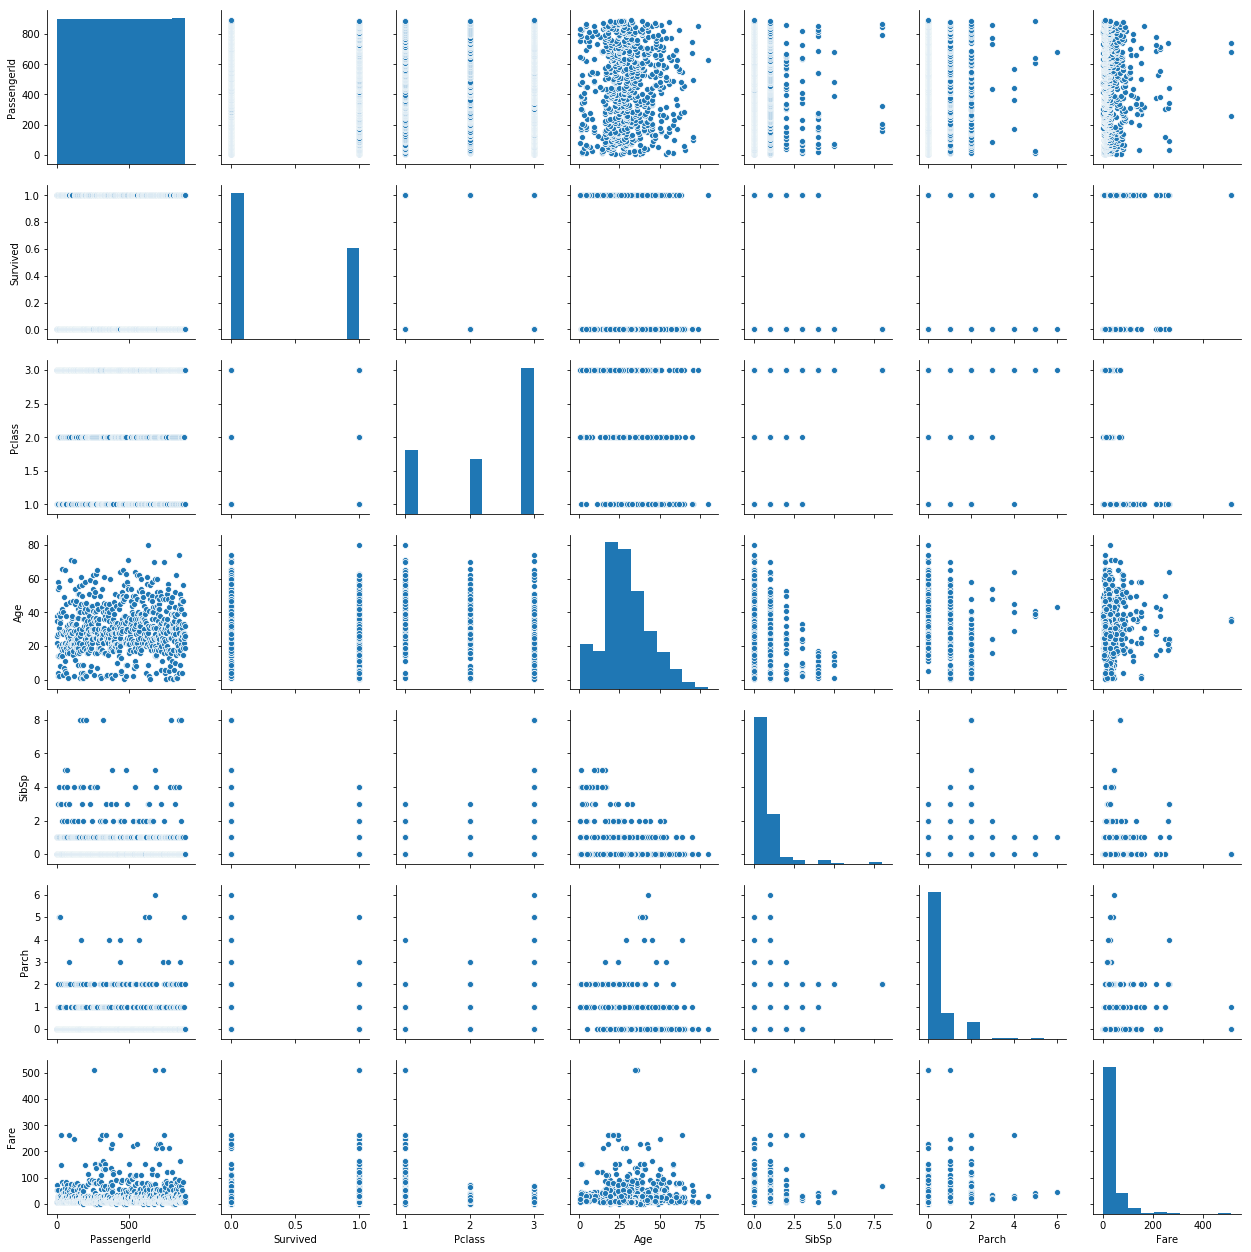

In [ ]:
sns.pairplot(train_df)

In [ ]:
?sns.pairplot

## Wrangle data

### Correcting by dropping features¶


Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 13) (418, 11) (891, 13) (418, 11)


('After', (891, 11), (418, 9), (891, 11), (418, 9))

### Creating new feature extracting from existing


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

# [A-Za-z] - matches any letter or digit

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare.


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,"(-0.001, 8.662]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,"(26.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,"(-0.001, 8.662]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,"(26.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,"(-0.001, 8.662]",1


In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 9))

### Converting a categorical feature¶

In [ ]:
sex_title = {'female': 1, 'male': 0}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_title)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand,Title
0,0,3,0,22.0,1,0,7.2500,S,"(-0.001, 8.662]",1
1,1,1,1,38.0,1,0,71.2833,C,"(26.0, 512.329]",3
2,1,3,1,26.0,0,0,7.9250,S,"(-0.001, 8.662]",2
3,1,1,1,35.0,1,0,53.1000,S,"(26.0, 512.329]",3
4,0,3,0,35.0,0,0,8.0500,S,"(-0.001, 8.662]",1


## Completing a numerical continuous feature¶


Method: 
More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


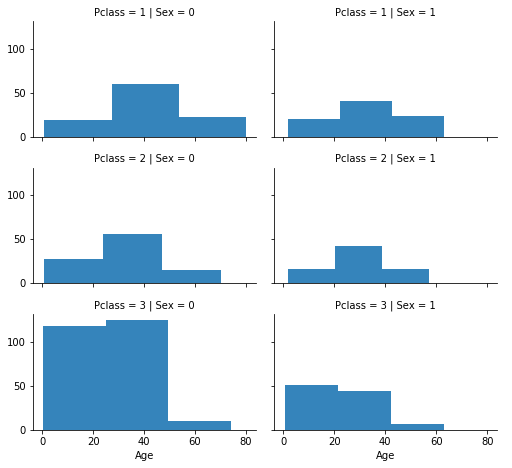

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Sex')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.9, bins=3)
grid.add_legend()

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

 guessed values of Age = median value within the 6 combinations rounded to nearest 0.5 age 


In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand,Title
0,0,3,0,22,1,0,7.2500,S,"(-0.001, 8.662]",1
1,1,1,1,38,1,0,71.2833,C,"(26.0, 512.329]",3
2,1,3,1,26,0,0,7.9250,S,"(-0.001, 8.662]",2
3,1,1,1,35,1,0,53.1000,S,"(26.0, 512.329]",3
4,0,3,0,35,0,0,8.0500,S,"(-0.001, 8.662]",1


Let us create Age bands and determine correlations with Survived.



In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.


In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand,Title
0,0,3,0,1,1,0,7.2500,S,"(-0.001, 8.662]",1
1,1,1,1,2,1,0,71.2833,C,"(26.0, 512.329]",3
2,1,3,1,1,0,0,7.9250,S,"(-0.001, 8.662]",2
3,1,1,1,2,1,0,53.1000,S,"(26.0, 512.329]",3
4,0,3,0,2,0,0,8.0500,S,"(-0.001, 8.662]",1


In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,"(-0.001, 8.662]",1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,"(26.0, 512.329]",3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,"(-0.001, 8.662]",2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,"(26.0, 512.329]",3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,"(-0.001, 8.662]",1,"(32.0, 48.0]"


## Create new feature combining existing features¶
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.


In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
pd.crosstab(train_df['FamilySize'], train_df['Survived'])

Survived,0,1
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [ ]:
# Check if there are any null values in the FamilySize dataset
train_df['FamilySize'].isnull().sum()

0

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

# isAlone = 1
# withFamily = 0

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FareBand,Title,IsAlone
0,0,3,0,1,7.2500,S,"(-0.001, 8.662]",1,0
1,1,1,1,2,71.2833,C,"(26.0, 512.329]",3,0
2,1,3,1,1,7.9250,S,"(-0.001, 8.662]",2,1
3,1,1,1,2,53.1000,S,"(26.0, 512.329]",3,0
4,0,3,0,2,8.0500,S,"(-0.001, 8.662]",1,1


We can also create an artificial feature combining Pclass and Age.


In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

# [:, Set value for an entire column

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


##Completing a categorical feature¶


In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


##Converting categorical feature to numeric¶


In [ ]:
embarked_values={'S': 0, 'C': 1, 'Q': 2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_values).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FareBand,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,"(-0.001, 8.662]",1,0,3
1,1,1,1,2,71.2833,1,"(26.0, 512.329]",3,0,2
2,1,3,1,1,7.9250,0,"(-0.001, 8.662]",2,1,3
3,1,1,1,2,53.1000,0,"(26.0, 512.329]",3,0,2
4,0,3,0,2,8.0500,0,"(-0.001, 8.662]",1,1,6


##Quick completing and converting a numeric feature¶

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Convert the Fare feature to ordinal values based on the FareBand.



In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [ ]:
test_df.head(10)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


### Model, predict and solve


In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).



*   Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
*   Inversely as Pclass increases, probability of Survived=1 decreases the most.
* This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
* So is Title as second highest positive correlation.



In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)
# Sex and Title contribute the most to understanding who has Survived
# Age*Class and Pclass contribute the most to understanding who has NOT Survived

# ? Why the Correlation is represented in numbers high then 1? Is not it should be between -1 and 1? 

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.



In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74